# Prime Numbers and Prime Factors

1. Generate a list of prime numbers up to a given limit.
2. Given a positive integer, return a list of prime factors.

In [1]:
import numpy as np

## Generation of Primes

The Sieve of Eratosthenes works by filtering multiples of numbers out of an ordered list of numbers between 2 and a maximum value. We start by removing any number greater than 2 that is divisible by 2, then move on to the next number, 3, and remove any number greater than 3 that is divisible by 3. Next is 5, then 7, then 11 (since 9 is gone due to being divisible by 3), and so on.

It is important to note that one needn't remove multiples of any number greater than the square root of the maximum value, as all multiples of remaining primes will have been removed already. For example, if the maximum value is 49, one can stop after 7, whereby 49 will have been the only number removed. All multiples of 11 within range (22, 33, 44) will have already been removed when testing for multiples of 2 or 3, as with multiples of 13, 17, 19, etc.

In the case below, I start with all even numbers greater than 2 removed, as it is easy to do with list slicing, and saves significant time at scale.

In [2]:
def gen_primes(limit):
    """Generates a list of prime numbers up to and including the given limit by way of the
    Sieve of Eratosthenes"""
    
    assert limit > 1, "no primes in this range"
    if limit == 2:
        return [2]
    
    # setup, create list of all odd numbers greater than 1
    numbers = list(range(3, limit+1, 2))
    
    ix = 0
    root_limit = np.sqrt(limit)
    while numbers[ix] <= root_limit:
        numbers = numbers[:ix+1] + [n for n in numbers[ix+1:] if n % numbers[ix] != 0]
        ix += 1
        
    return [2] + numbers

In [3]:
print(gen_primes(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


Looks pretty primal.

In the interest of doing a basic timing check, a slightly different approach:

In [4]:
def gen_primes2(limit):
    """Generates a list of prime numbers up to and including the given limit by way of the
    Sieve of Eratosthenes, using a for-loop instead of list comp"""
    
    # setup, create list of all numbers either odd or prime
    numbers = list(range(3, limit+1, 2))
    
    ix = 0
    root_limit = np.sqrt(limit)
    while numbers[ix] <= root_limit:
        for n in numbers[ix+1:]:
            if n % numbers[ix] == 0:
                numbers.remove(n)
        ix += 1
        
    return [2] + numbers

In [5]:
print(gen_primes2(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [6]:
for n in range(1,6):
    n = 10 ** n
    print("\nn =", n)
    print("Methods agree:", gen_primes(n) == gen_primes2(n))
    print("Method 1:", end=" ")
    %timeit gen_primes(n)
    print("Method 2:", end=" ")
    %timeit gen_primes2(n)


n = 10
Methods agree: True
Method 1: 4.74 µs ± 477 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 2: 3.45 µs ± 104 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

n = 100
Methods agree: True
Method 1: 20.2 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 2: 31.1 µs ± 2.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

n = 1000
Methods agree: True
Method 1: 374 µs ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Method 2: 1.08 ms ± 99.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

n = 10000
Methods agree: True
Method 1: 4.93 ms ± 182 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Method 2: 81.4 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

n = 100000
Methods agree: True
Method 1: 99.7 ms ± 3.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Method 2: 8.13 s ± 56.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Rebuilidng the list with a list comprehension each time through the while loop is noticeably faster than testing and removing numbers one by one once n > 100, and the gap widens significantly as limit increases. The `.remove()` method is O(n), worst-case, on top of another O(n) for-loop, so O(n^2).

But I anticipate that using Numpy would speed things up tremendously...

In [6]:
def gen_primes_np(limit):
    
    # setup with similar shortcut
    nums = np.arange(3, limit+1, 2)
    nums = np.insert(nums, 0, 2)

    ix = 1
    root_limit = np.sqrt(limit)
    while nums[ix] <= root_limit:
        nums = nums[np.logical_or(nums % nums[ix] != 0, nums == nums[ix])]
        ix += 1
    
    return nums

In [7]:
gen_primes_np(100)

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

In [526]:
for n in range(1,7):
    n = 10 ** n
    print("\nn =", n)
    print("Methods agree:", np.array_equal(gen_primes_np(100), np.array(gen_primes(100))))
    print("Method 1:", end=" ")
    %timeit gen_primes(n)
    print("Method 2:", end=" ")
    %timeit gen_primes_np(n)


n = 10
Methods agree: True
Method 1: 2.46 µs ± 192 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 2: 39.7 µs ± 1.79 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

n = 100
Methods agree: True
Method 1: 15.6 µs ± 368 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 2: 51.9 µs ± 5.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

n = 1000
Methods agree: True
Method 1: 307 µs ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Method 2: 172 µs ± 7.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

n = 10000
Methods agree: True
Method 1: 5.34 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Method 2: 1.04 ms ± 52.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

n = 100000
Methods agree: True
Method 1: 111 ms ± 8.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Method 2: 14.1 ms ± 801 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

n = 1000000
Methods agre

And indeed, numpy seriously delivers at scale, though starts off significantly slower, and doesn't catch up until somewhere between 100 and 1000. No contest from there on out though. 

## Find Prime Factors of a Number

In [8]:
def prime_factors_v1(n, primes):
    """Returns a list of prime factors for positive integer n"""
    
    assert n > 0, "n must be a positive integer"
    assert n != 1, "1 is neither prime nor composite"
    
    prime_factors = []
    p_ix = 0
    
    while n not in primes:
        prime = primes[p_ix]
        if n % prime == 0:
            prime_factors.append(prime)
            n //= prime
        else:
            p_ix += 1
    
    prime_factors.append(n)
    
    return prime_factors

In [519]:
primes = gen_primes_np(12)
for n in range(2,12):
    print(f"{n}: {prime_factors_v1(n, primes)}")

2: [2]
3: [3]
4: [2, 2]
5: [5]
6: [2, 3]
7: [7]
8: [2, 2, 2]
9: [3, 3]
10: [2, 5]
11: [11]


In [520]:
primes = gen_primes_np(10010)
for n in range(10000,10010):
    print(f"{n}: {prime_factors_v1(n, primes)}")   

10000: [2, 2, 2, 2, 5, 5, 5, 5]
10001: [73, 137]
10002: [2, 3, 1667]
10003: [7, 1429]
10004: [2, 2, 41, 61]
10005: [3, 5, 23, 29]
10006: [2, 5003]
10007: [10007]
10008: [2, 2, 2, 3, 3, 139]
10009: [10009]


Now, this method works well enough, but checking if `n` is a member of `primes` each time through the while-loop is an O(n) operation, since `primes` is passed as a list or tuple. It would speed things up significantly if `primes` were a set, but we need to reference elements by index in ascending order, so we'd have to have a `primes` set and a `primes` list/tuple. Fine if small, but not ideal if our list of primes takes up a significant chunk of memory. So why check for membership in `primes` at all?

In [9]:
def prime_factors_v2(n, primes):
    """Returns a list of prime factors for positive integer n"""
    
    assert n > 0, "n must be a positive integer"
    assert n != 1, "1 is neither prime nor composite"
    
    prime_factors = []
    p_ix = 0
    
    while n > 1:
        prime = primes[p_ix]
        if n % prime == 0:
            prime_factors.append(prime)
            n //= prime
        else:
            p_ix += 1
       
    return prime_factors

In [521]:
primes = gen_primes_np(110)
for n in range(100,110):
    print(f"{n}: {prime_factors_v2(n, primes)}")

100: [2, 2, 5, 5]
101: [101]
102: [2, 3, 17]
103: [103]
104: [2, 2, 2, 13]
105: [3, 5, 7]
106: [2, 53]
107: [107]
108: [2, 2, 3, 3, 3]
109: [109]


Another idea, essentially the same idea as the last, but more elegant/efficient:

In [10]:
def prime_factors_v3(n, primes):
    """Returns a list of prime factors for positive integer n"""
    
    assert n > 0, "n must be a positive integer"
    assert n != 1, "1 is neither prime nor composite"
    
    prime_factors = []

    for prime in primes:
        while n % prime == 0:
            prime_factors.append(prime)
            n //= prime
        if n == 1:
            break

    return prime_factors

In [522]:
primes = gen_primes_np(1010)
for n in range(1000,1010):
    print(f"{n}: {prime_factors_v3(n, primes)}")

1000: [2, 2, 2, 5, 5, 5]
1001: [7, 11, 13]
1002: [2, 3, 167]
1003: [17, 59]
1004: [2, 2, 251]
1005: [3, 5, 67]
1006: [2, 503]
1007: [19, 53]
1008: [2, 2, 2, 2, 3, 3, 7]
1009: [1009]


Let's see how each does on timing...

In [11]:
for n in range(1000,1010):
    primes = gen_primes_np(n)
    print("\nn =", n)
    print("Prime factors:", prime_factors_v2(n, primes))
    agree = (
        prime_factors_v1(n, primes) == 
        prime_factors_v2(n, primes) == 
        prime_factors_v3(n, primes)
    )
    print("Methods agree:", agree)
    if not agree:
        continue
    for i, func in enumerate([
        prime_factors_v1, 
        prime_factors_v2, 
        prime_factors_v3,         
    ]):
        print(f"Method {i+1}:", end=" ")
        %timeit func(n, primes)


n = 1000
Prime factors: [2, 2, 2, 5, 5, 5]
Methods agree: True
Method 1: 23.6 µs ± 2.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Method 2: 6.93 µs ± 749 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 3: 5.37 µs ± 453 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

n = 1001
Prime factors: [7, 11, 13]
Methods agree: True
Method 1: 17.9 µs ± 1.78 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 2: 5.2 µs ± 131 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 3: 4.25 µs ± 77 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

n = 1002
Prime factors: [2, 3, 167]
Methods agree: True
Method 1: 11.2 µs ± 862 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 2: 21.3 µs ± 481 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Method 3: 18.2 µs ± 244 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

n = 1003
Prime factors: [17, 59]
Methods agree: True
Method 1: 21.1

This is interesting. Method 3 is almost always faster than method 2. Most of the time, both 2 and 3 are far faster than method 1. However, method 1 is occasionally faster than the other two (e.g. n=1002, n=1004, n=1006, n=1009) by up to an order of magnitude. This happens when n is a prime itself, or a multiple of a prime and either 2, 2 and 2, or 2 and 3. In these cases, checking for primality pays off, because one needn't cycle through all or nearly all of the primes to see if each is a prime factor. Otherwise, checking for primality each time around the while-loop unnecessarily adds to the runtime.

Methods 2 and 3 are similar in terms of complexity. 2 loops as long as n is greater than one, and each time, checks to see if n is divisible by the prime at current index. If so, it divides n by the prime, sets n as the quotient, then appends that prime to the list of factors; if not, the index variable is incremented. Method 3 is more effieicnt, as it loops through each prime, and will enter a while-loop if and as long as n is divisible by the current prime, in which, as with method 2, n is divided by the prime and updated with the value of the quotient, and the prime is appended to the list of factors. As soon as n=1, the for-loop breaks. Method 2 is least effient in the cases where method 1 is most efficient, as it has to keep on checking and looping through primes until it hits a large prime that yields a quotient of 1. While method 3 also cycles through all the primes, and checks to see if n is divisible by each or if n=1, it apparently does this more efficiently than method 2.

It's tough to nail down the complexity of 2 or 3. Worst case would be if n is prime, as one would have to cycle through the entire list of primes until reaching the equivalent value. Most times, it goes much faster, since this needn't happen, as demonstrated by the cases of 1024 (2^10) and 1021 (prime):

In [523]:
primes = gen_primes_np(1024)
%timeit prime_factors_v3(1024, primes)
%timeit prime_factors_v3(1021, primes)

4.88 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
72.8 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


As these only cycle through all primes <= n, and not n, the complexity is more related to the number of primes than it is n. This gives each a complexity of roughly O(n / log(n)) — and we'll get to why in bit.

### Now hold on a sec...

Do we even need a list of primes? What if we just cycled through a range of numbers from 2 through n, checked the modulus as above, divided by the number as many times as possible if modulus = 0, and then moved on to the next number? Dividing by 2 as many times as possible eliminates all multiples of 2 as possible factors, as does dividing by 3 for multiples of 3, and so on. This is still an O(n) operation, but it eliminates the need to externally construct a list of primes — something we haven't been including in the timing thus far.

**But wait!!** We only have to loop over a range of 2 through n if we need to include the possibility of dividing n by itself in the construction of our prime factors list. Otherwise, as with the generation of a list of primes above, **we only have to loop over 2 through the floor of √n**, and then append n to our list of prime factors if it is not equal to 1. For example, if n=62, it will be divisible by 2 once, leaving n=31, a prime. After looping sequentially through integers 3-7 (as 7 is the floor of √62), 31 will be appended to the list of prime factors, providing a complete and accurate list.

In [14]:
def prime_factors_v4(n):
    """Returns a list of prime factors for positive integer n with no list of primes
    required as input"""
    
    assert n > 0, "n must be a positive integer"
    assert n != 1, "1 is neither prime nor composite"
    
    prime_factors = []

    # loop from 2 through the floor of root n
    for i in range(2, int(np.sqrt(n))+1):
        while n % i == 0:
            prime_factors.append(i)
            n //= i
        if n == 1:
            return prime_factors

    prime_factors.append(n)
            
    return prime_factors

In [15]:
for n in range(100,110):
    print(f"{n}: {prime_factors_v4(n)}")

100: [2, 2, 5, 5]
101: [101]
102: [2, 3, 17]
103: [103]
104: [2, 2, 2, 13]
105: [3, 5, 7]
106: [2, 53]
107: [107]
108: [2, 2, 3, 3, 3]
109: [109]


This should have a max runtime of roughly O(√n), even considering all possible subloops. Consider n=512 (2^9). The floor of √512 is 22, but it won't even get that far, as it will simply loop divide-by-2 nine times before n=1 and the loop breaks. With n=521 (prime), the floor of √521 is also 22, and it will loop from 2 through 22 without finding a zero-modulus, whereby 521 is the only possible factor. 

Let's check timing against our most efficient method above, method 3 — with and without prime list generation included in the timing...

In [42]:
np.random.seed(23)
for n in sorted(np.random.choice(100000, 10)):
    print("\nn =", n)
    print("Prime factors:", prime_factors_v4(n))
    agree = (
        prime_factors_v1(n, gen_primes_np(n)) == 
        prime_factors_v3(n, gen_primes_np(n)) == 
        prime_factors_v4(n)
    )
    print("Methods agree:", agree)
    if not agree:
        continue
    print(f"Method 3 (prime gen):\t", end=" ")
    %timeit prime_factors_v3(n, gen_primes_np(n))
    print(f"Method 3:\t\t", end=" ")
    primes = gen_primes(n)
    %timeit prime_factors_v3(n, primes)   
    print(f"Method 4:\t\t", end=" ")
    %timeit prime_factors_v4(n)


n = 9256
Prime factors: [2, 2, 2, 13, 89]
Methods agree: True
Method 3 (prime gen):	 1.09 ms ± 90 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Method 3:		 17.5 µs ± 595 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Method 4:		 52.9 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

n = 9704
Prime factors: [2, 2, 2, 1213]
Methods agree: True
Method 3 (prime gen):	 1.02 ms ± 18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Method 3:		 107 µs ± 1.78 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Method 4:		 57.3 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

n = 16423
Prime factors: [11, 1493]
Methods agree: True
Method 3 (prime gen):	 1.7 ms ± 40.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Method 3:		 121 µs ± 1.98 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Method 4:		 67.9 µs ± 3.86 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

n = 20058
Prime facto

When including the creation of our list of primes, method 4 is clearly faster, by several orders of magnitude. If we have a list of primes available, method 3 is faster when all prime factors are roughly less than √n. If any of the prime factors are relatively large, or if n itself is prime (weak spots for method 3 as we discovered previously), method 4 soundly defeats method 3.

Of course, we could also apply the same √n limit to our list of primes, which would speed up method 3 even more. But as a standalone solution, the O(√n) method 4 is preferable by far.

## Fun with Primes

The Prime Number Theorem suggests that π(N) ~ N / ln(N), where π(N) is the prime-counting function, which returns the number of primes less than or equal to N. It follows, then, that the ratio of primes to all numbers could be expressed as π(N) / N ~ 1 / ln(N).

The PNT is how we would arrive at a complexity of O(N / ln(N)) for methods 2 and 3 above.

Let's visualize prime content as N increases to 1,000,000.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [35]:
# all primes up to 100,000,000
p_mil = gen_primes_np(1e8)

In [36]:
# all primes up to 10,000,000
p_10mil = gen_primes_np(1e7)

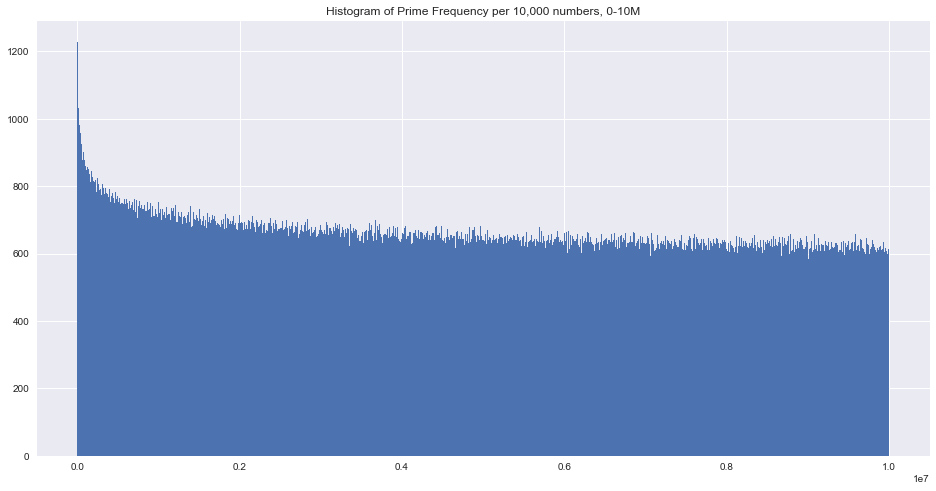

In [82]:
plt.figure(figsize=(16,8))
plt.hist(p_10mil, bins=1000)
plt.title("Histogram of Prime Frequency per 10,000 numbers, 0-10M");
# sns.distplot(p_10mil, bins=50, kde=False).set_title("Histogram of Prime Frequency");

In [43]:
# number of primes up to 10M
p_10mil.shape

(664579,)

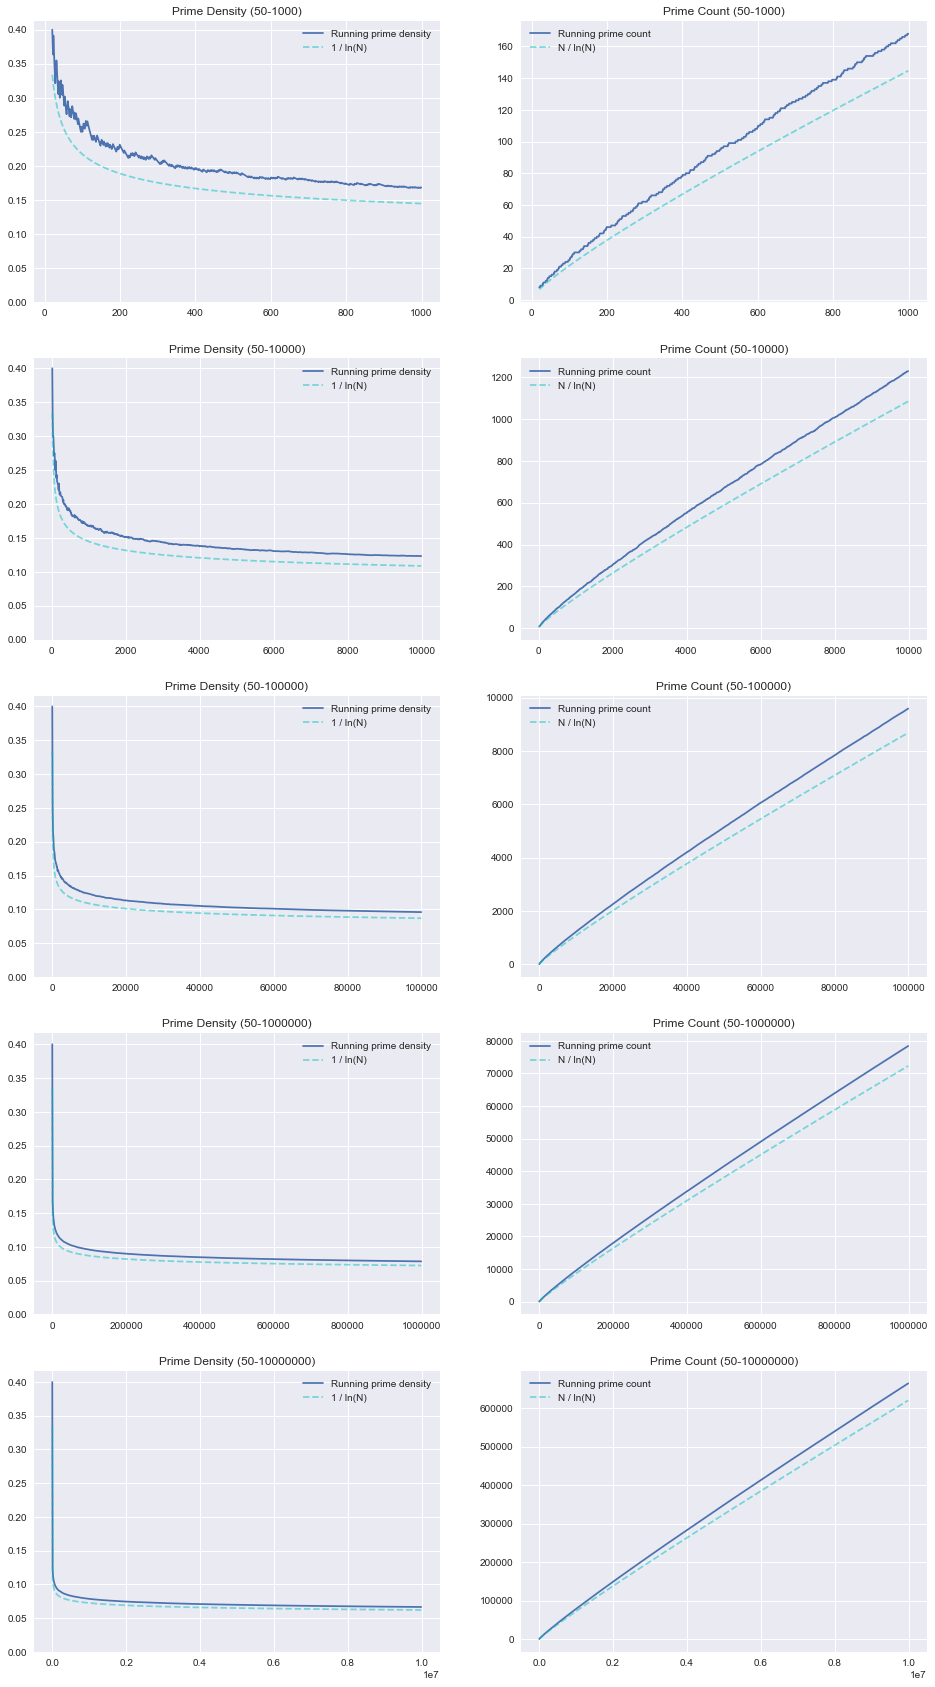

In [110]:
# resolution, max 1000 - higher == better
res = 1000

fig, ax = plt.subplots(5, 2, figsize=(16,30))

for i, max_n in enumerate([1000, 10000, 100000, 1000000, 10000000]):
    
    x = np.arange(20, max_n, max_n // res)
    inv_logx = 1 / np.log(x)
    x_inv_logx = x / np.log(x)
    
    running_prime_count = []
    running_prime_ratio = []
    # for n in range(100,1000001,50):
    for n in range(20, max_n, max_n // res):
        pcount = p_10mil[p_10mil <= n].shape[0]
        running_prime_count.append(pcount)
        running_prime_ratio.append(pcount / n)

    # prime density plots
    ax[i][0].plot(x, running_prime_ratio, label="Running prime density")
    ax[i][0].plot(x, inv_logx, 'c--', alpha=0.5, label="1 / ln(N)")
    ax[i][0].set_ylim(0)
    ax[i][0].set_title(f"Prime Density (50-{max_n})")
    ax[i][0].legend()
    
    # prime count plots
    ax[i][1].plot(x, running_prime_count, label="Running prime count")
    ax[i][1].plot(x, x_inv_logx, 'c--', alpha=0.5, label="N / ln(N)")
    ax[i][1].set_title(f"Prime Count (50-{max_n})")
    ax[i][1].legend();        

One can see that the density and count curves smooth out as N increases, in greater and greater approximation of the theoretical curves.

The PNT also suggests that, despite the apparent divergence of π(N) and N / ln(N) as seen above, the limit of π(N) / (N / ln(N)) as N -> ∞ is 1.

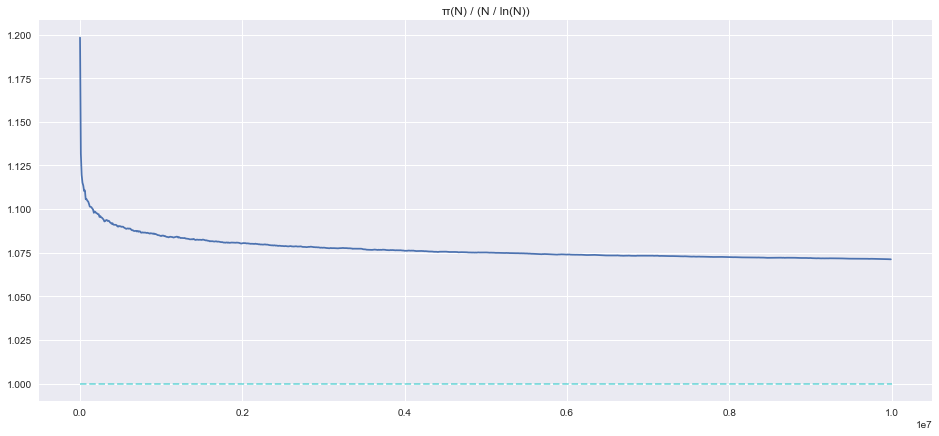

In [111]:
plt.figure(figsize=(16,7))
x_sm = np.linspace(20, int(1e7))
one = np.ones(x_sm.shape[0])
plt.plot(x, (running_prime_count * np.log(x)) / x)
plt.plot(x_sm, one, "c--", alpha=0.5)
# plt.ylim(0.95,1.25)
plt.title("π(N) / (N / ln(N))");

Clearly a ways to go before convergence, even at N = 10M, but it does appear to be heading that way.